# Netflix - Data Exploration and Visualisation By VM Kamessh - 10Nov2023

In [1]:
import pandas as pd #to read the datasets
import numpy as np # to work with arrays, single or multidimentional array
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import plotly.express as px # for data visualization
from textblob import TextBlob # for sentiment analysis

### Loading csv file data to Pandas DataFrame

In [2]:
df = pd.read_csv("netflix_data.csv")

### Sense check of Dataframe

In [3]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

### Checking the Dupliate entries in the entire Dataframe

In [4]:
df.duplicated().sum()

0

###### The above result indicates that there is No duplicate entries

### Verifying Name of Columns

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Column wise info about data type, name and Null value status

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Verifying Sum of Null Values on each column

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Visual representation of Null values using Seaborn heatmap

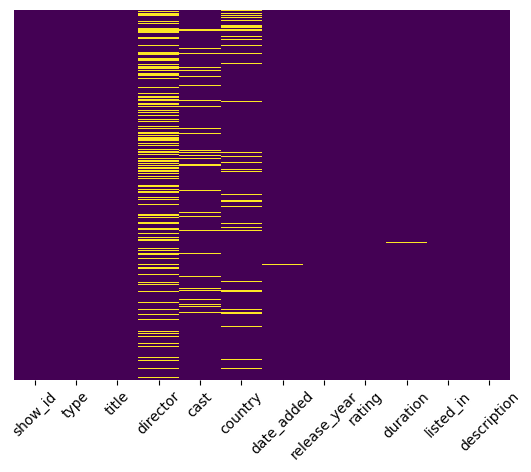

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

### Null values on each column shown (as percentage)

In [9]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

###  Treatment of missing values on column [director],[cast],[country] & [rating]

In [10]:
df['director'].fillna('Unknown Director', inplace=True)
df['cast'].fillna('Unknown Cast', inplace=True)
df['country'].fillna('Unknown Country', inplace=True)
df["rating"].fillna("Unknown rating", inplace = True)
# removing unwanted space in country
df['country'] =  df.country.str.strip()

###  Filling missing values for "date_added" field with 0

In [11]:
# Since date added suppose to be date column, we're replacing with 0 instead of character string
df["date_added"].fillna(0, inplace = True)

### Filling the misplaced duration values from "rating" column to "duration" column
#### Because missing Duration values for certain rows exist in rating colum

In [12]:
df["duration"].fillna(df['rating'], inplace = True)

### Finding the rows of "rating" column which contains rating in minutes

In [13]:
df[df["rating"].str.contains("min",na=False)]
# For the below entries we could see that rating column contains the duration information.

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...

### Replacing the values of rows in "rating" column which contains rating in minutes to "Unknown rating"

In [14]:
# df["rating"] = df["rating"].apply(lambda x: None if "min" in str(x) else x)
df["rating"] = df["rating"].apply(lambda x: "Unknown rating" if "min" in str(x) else x)

### Creation of New column to capture the Numeric value of minutes/session of duration column

In [15]:
df['Duration_New'] = df['duration'].str.extract('(\d+)')

In [16]:
# Show id's (s5542, s5795, s5814) were rating contained the duration values
# just to check one of the duration values are updated in 
# the right column for the discrepant show id's mentioned above
df3 = df[df["show_id"]=="s5542"]
df3

show_id   type            title    director        cast        country  \
5541   s5542  Movie  Louis C.K. 2017  Louis C.K.  Louis C.K.  United States   

         date_added  release_year          rating duration listed_in  \
5541  April 4, 2017          2017  Unknown rating   74 min    Movies   

                                            description Duration_New  
5541  Louis C.K. muses on religion, eternal love, gi...           74

### Reverifying sum of Null Values on each column

In [17]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Duration_New    0
dtype: int64

### Converting the data type of "Duration_New" column to Integer to faciliate further analysis

In [18]:
df['Duration_New'] = df['Duration_New'].astype(int)

### Adding a separate column for Formatted Date, Month in Text and Year & Month column

In [19]:
df["Added_Dt"] = pd.to_datetime(df['date_added'], errors="coerce")
df['Added_Year'] = df["Added_Dt"].dt.year
df["Added_Mnth"] = df["Added_Dt"].dt.month_name(locale = 'English')
df['Added_Yr_Month'] = df['Added_Dt'].astype(str).str[:7]
df['Added_Yr'] = df['Added_Dt'].astype(str).str[:4]
# finding the No. of Years gap between release and launch in Netflix
df['No.of years btwn release and added'] = ((df.Added_Year - df.release_year))

In [20]:
# Checking the info to ensure the Duration_New is converted to Integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   show_id                             8807 non-null   object        
 1   type                                8807 non-null   object        
 2   title                               8807 non-null   object        
 3   director                            8807 non-null   object        
 4   cast                                8807 non-null   object        
 5   country                             8807 non-null   object        
 6   date_added                          8807 non-null   object        
 7   release_year                        8807 non-null   int64         
 8   rating                              8807 non-null   object        
 9   duration                            8807 non-null   object        
 10  listed_in               

### Verifying No. of Rows & Columns in Dataframe

In [21]:
df.shape

(8807, 19)

In [22]:
df.isnull().sum()

show_id                               0
type                                  0
title                                 0
director                              0
cast                                  0
country                               0
date_added                            0
release_year                          0
rating                                0
duration                              0
listed_in                             0
description                           0
Duration_New                          0
Added_Dt                              0
Added_Year                            0
Added_Mnth                            0
Added_Yr_Month                        0
Added_Yr                              0
No.of years btwn release and added    0
dtype: int64

In [23]:
df.head()

show_id     type                  title          director  \
0      s1    Movie   Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show          Blood & Water  Unknown Director   
2      s3  TV Show              Ganglands   Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans  Unknown Director   
4      s5  TV Show           Kota Factory  Unknown Director   

                                                cast          country  \
0                                       Unknown Cast    United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...     South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Unknown Country   
3                                       Unknown Cast  Unknown Country   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...            India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  Duration_New   Added_Dt  \
0  As her father nears the end of his life, filmm...            90 2021-09-25   
1  After crossing paths at a party, a Cape Town t...             2 2021-09-24   
2  To protect his family from a powerful drug lor...             1 2021-09-24   
3  Feuds, flirtations and toilet talk go down amo...             1 2021-09-24   
4  In a city of coaching centers known to train I...             2 2021-09-24   

   Added_Year Added_Mnth Added_Yr_Month Added_Yr  \
0        2021  September        2021-09     2021   
1        2021  September        2021-09     2021   
2        2021  September        2021-09     2021   
3        2021  September        2021-09     2021   
4        2021  September        2021-09     2021   

   No.of years btwn release and added  
0                                   1  
1                                   0  
2                                   0  
3                                   0  
4                                   0

### Verifying Unique values

In [24]:
# Verifying the Number of Unique values on each columns
df.nunique()

show_id                               8807
type                                     2
title                                 8804
director                              4529
cast                                  7693
country                                749
date_added                            1768
release_year                            74
rating                                  15
duration                               220
listed_in                              514
description                           8775
Duration_New                           210
Added_Dt                              1715
Added_Year                              15
Added_Mnth                              12
Added_Yr_Month                         109
Added_Yr                                15
No.of years btwn release and added      83
dtype: int64

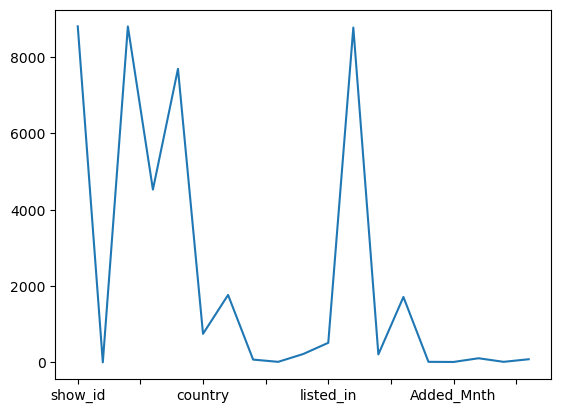

In [25]:
# Plotting the number of number of unique values
df.nunique().plot()
plt.show()

### Verifying Total Number of Null values in the entire Dataframe

In [26]:
df.isna().sum().sum()

0

In [27]:
df['title'].nunique()

8804

### Filtering Indian contents based on country field for further analysis

In [28]:
df_india = df.loc[df.country.str.contains("India")]

## UNIVARIATE ANALYSIS (for multiple variables refer below)

## Distribution of Content in Netflix

### To begin with we would start by looking at the distribution of content ratings on Netflix

In [29]:
y = df.groupby(['type']).size().reset_index(name='counts')
pieChart = px.pie(y, values='counts', names='type', 
                  title='Distribution of Content Type on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

#### The content released on Netflix is still dominated by movies in line with the company's long history.

In [30]:
y = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(y, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Netflix',
                  color_discrete_sequence=px.colors.qualitative.Set2)
pieChart.show()

#### The above Piechart shows that majority of content on Netflix is falls under “TV-MA”, followed by "TV-14" & "TV-PG", which means that most of the content available on Netflix is intended for viewing by Mature and Adult audiences, Ages 14 & up and Parental guidance.

### Analysis of the sentiment of content on Netflix

In [31]:
cnt_type=df[['type','description']]
cnt_type=cnt_type.rename(columns={'type':'Type'})
for index,row in cnt_type.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    cnt_type.loc[[index,2],'Sentiment']=sent

cnt_type=cnt_type.groupby(['Type','Sentiment']).size().reset_index(name='Total Content')
fig8 = px.bar(cnt_type, x="Type", y="Total Content", color="Sentiment",
              title="Sentiment of Content Type on Netflix",text_auto=True)
fig8.show()

#### The above graph indicates that the overall positive content is always greater than the neutral and negative content combined

### No. of Contents released in Netflix over the years

In [32]:
filtered_Yr=pd.DataFrame()
filtered_Yr=df['release_year']
filtered_Yr=filtered_Yr.to_frame()
filtered_Yr.columns=['release_year']
Release_Yr=filtered_Yr.groupby(['release_year']).size().reset_index(name='Total Content')
Release_Yr=Release_Yr.sort_values(by=['Total Content'],ascending=False)
Release_YrTop10=Release_Yr
Release_YrTop10=Release_YrTop10.sort_values(by=['Total Content'])
fig5=px.bar(Release_YrTop10,x='release_year',y='Total Content',color='Total Content', 
            title='No. of Contents relased in Netflix over the years',text_auto=True,height=500)
fig5.show()

#### As can be seen from the above graph that post pandemic content release getting increased subsequently.

### Analysing Genre in different dimension

In [33]:
# To get the count of No. of unique values of Rating column
df.rating.nunique()

15

In [34]:
# To get unique values of Rating column
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Unknown rating', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [35]:
ratings_ages = {'TV-PG': 'Older Kids','TV-MA': 'Adults','TV-Y7-FV': 'Older Kids','TV-Y7': 'Older Kids','TV-14': 'Teens',
                'R': 'Adults','TV-Y': 'Kids','NR': 'Adults','PG-13': 'Teens','TV-G': 'Kids','PG': 'Older Kids','G': 'Kids',
                'UR': 'Adults','NC-17': 'Adults'}
df["ratings_ages"]=df["rating"].replace(ratings_ages)
movies=df[df["type"]=="Movie"]
tv=df[df["type"]=="TV Show"]

### Categories of Genre present in Netflix (Overall)

In [36]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
px.pie(df,names="ratings_ages",values=df.index, title="Categories of Genre present in Netflix",hole=.3)

#### From the above pie chart we could see that most of the genre in general are Adult content followed by Teens, Older kids, Kids content contributes less than 10%.

### Categories of Genre present in Netflix (Movies)

In [37]:
px.pie(movies,names="ratings_ages",values=movies.index,title="Categories of Genre present in [Movies]",hole=.3)

#### From the above pie chart we could see that most of the Movies are Adult content followed by Teens, Older kids, Kids content contributes less than 5%

### Categories of Genre present in Netflix (TV Shows)

In [38]:
px.pie(tv,names="ratings_ages",values=tv.index,title="Categories of Genre present in [TV Shows]")

#### From the above pie chart we could see Kids contents bit higher when compared with Movies and Adult and Teens content are widely shown genres

### Relation between content Type vs Rating

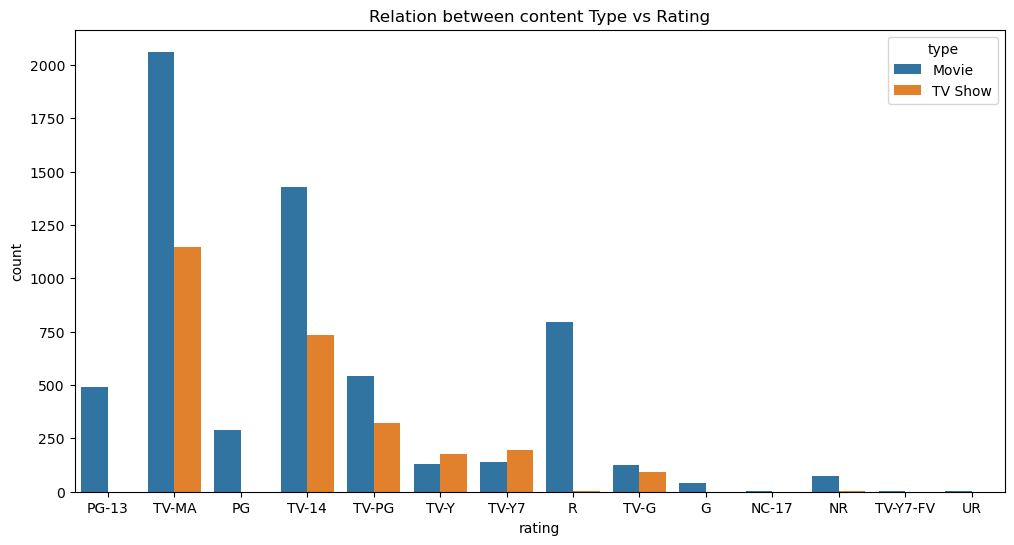

In [39]:
# Unnesting the data
filtered_ctgry=df['listed_in'].str.split(',',expand=True).stack()
filtered_ctgry=filtered_ctgry.to_frame()
filtered_ctgry.columns=['Content_Category']
df2 = filtered_ctgry.groupby(['Content_Category'])['Content_Category'].count()
plt.figure(figsize = (12, 6))
plt.title("Relation between content Type vs Rating")
# we're excluding the unknown while plotting the graph
df2 = df.loc[df["rating"] !="Unknown rating"]
sns.countplot(x='rating',hue = "type",data = df2)
plt.show()

#### The above graph shows that genre which are TV-MA, TV-14 followed by TV-PG contributes the highest content being shown in Netflix.

### Top 15 Genere categories on Netflix

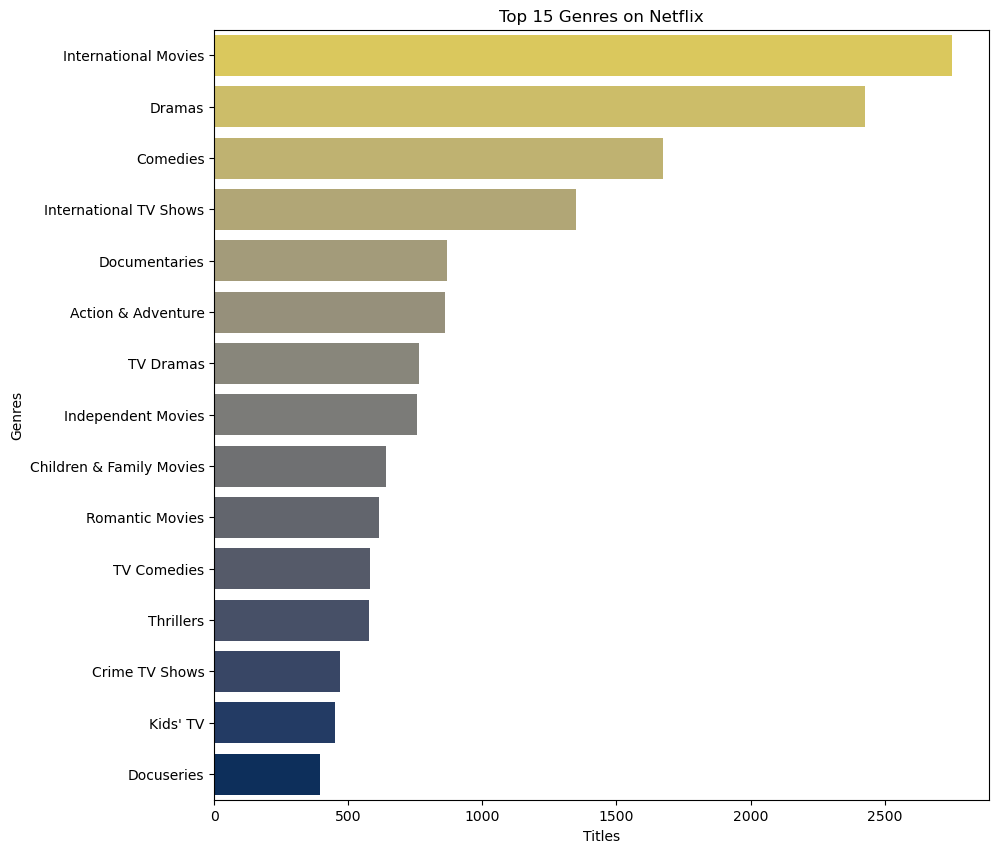

In [40]:
# Unnesting the data
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:15], palette='cividis_r')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

#### From the graph, we know that International Movies take the first place, followed by dramas and comedies.

### Top 10 Successful directors on Netflix (Entire Content)

In [41]:
filtered_directors=pd.DataFrame()
# Unnesting the data
filtered_directors=df['director'].str.split(',',expand=True).stack().reset_index(level=1, drop=True)
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='Unknown Director']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop10=directors.head(10)
directorsTop10=directorsTop10.sort_values(by=['Total Content'])
fig=px.bar(directorsTop10,x='Total Content',y='Director',color='Total Content',
           title='Top 10 Directors on Netflix (Entire Content)',text_auto=True,height=500)
fig.show()

#### Directors, Rajiv Chilaka, Raúl Campos,  Jan Suter, Suhas Kadav & Marcus Raboy are highest content contributing directors as per the contents streamed in Netflix platform. Note: Null values excluded in this analysis.

### Top 10 Directors on Netflix in [Movies]

In [42]:
filtered_directors=pd.DataFrame()
# Unnesting the data
filtered_directors=movies['director'].str.split(',',expand=True).stack().reset_index(level=1, drop=True)
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
# we're excluding the unknown director information
directors=directors[directors.Director !='Unknown Director']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop10=directors.head(10)
directorsTop10=directorsTop10.sort_values(by=['Total Content'])
fig=px.bar(directorsTop10,x='Total Content',y='Director',color='Total Content',
           title='Top 10 Directors on Netflix in [Movies]',text_auto=True,height=500)
fig.show()

#### The above graph indicates that Rajiv Chilaka, Raul Campas, Jan Suker as top 3 directors who have contrubuted more movie content.

### Top 10 Directors on Netflix in [TV Shows]

In [43]:
filtered_directors=pd.DataFrame()
# Unnesting the data
filtered_directors=tv['director'].str.split(',',expand=True).stack().reset_index(level=1, drop=True)
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
# we're excluding the unknown director information
directors=directors[directors.Director !='Unknown Director']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop10=directors.head(10)
directorsTop10=directorsTop10.sort_values(by=['Total Content'])
fig=px.bar(directorsTop10,x='Total Content',y='Director',color='Total Content',
           title='Top 10 Directors on Netflix in [TV Shows]',text_auto=True,height=500)
fig.show()

#### The above graph indicates that Ken Burns & Alastair contributed 3 contents until 2021 which is the highest among others.

### Top 10 Successful Actors on Netflix (Entire Content)

In [44]:
filtered_cast=pd.DataFrame()
# Unnesting the data
filtered_cast=df['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
# we're excluding the unknown cast information
actors=actors[actors.Actor !='Unknown Cast']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop10=actors.head(10)
actorsTop10=actorsTop10.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop10,x='Total Content',y='Actor',color='Total Content', 
            title='Top 10 Actors on Netflix (Entire Content)',text_auto=True,height=500)
fig2.show()

#### Out of 39k cast crew members,  Anupam Kher, Rupa Bhimani,  Takahiro Sakurai,  Julie Tejwani, Om Puri are others listed above are appeared on most of the content streamed in Netflix. Note: Null values excluded in this analysis.

### Top 10 Successful Actors on Netflix (TV Shows)

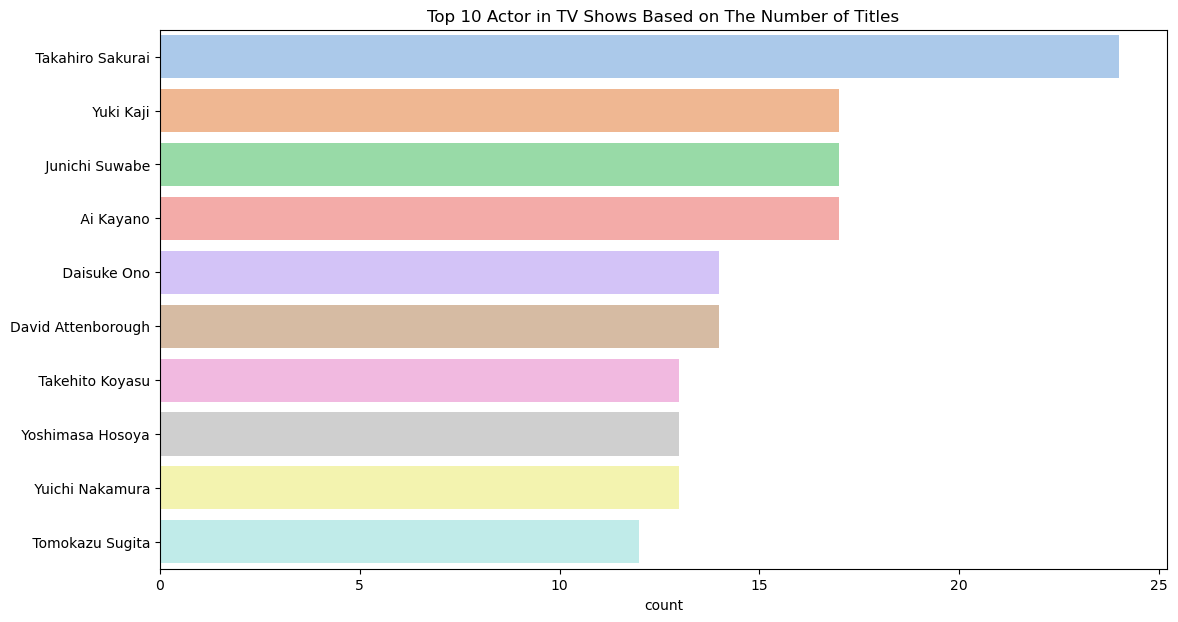

In [45]:
netflix_shows_df = df.loc[df['type']=='TV Show']
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'Unknown Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor in TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

#### The top actor on Netflix TV Show, based on the number of titles, is Takahiro Sakurai.

### Top 10 Successful Actors on Netflix (Movies)

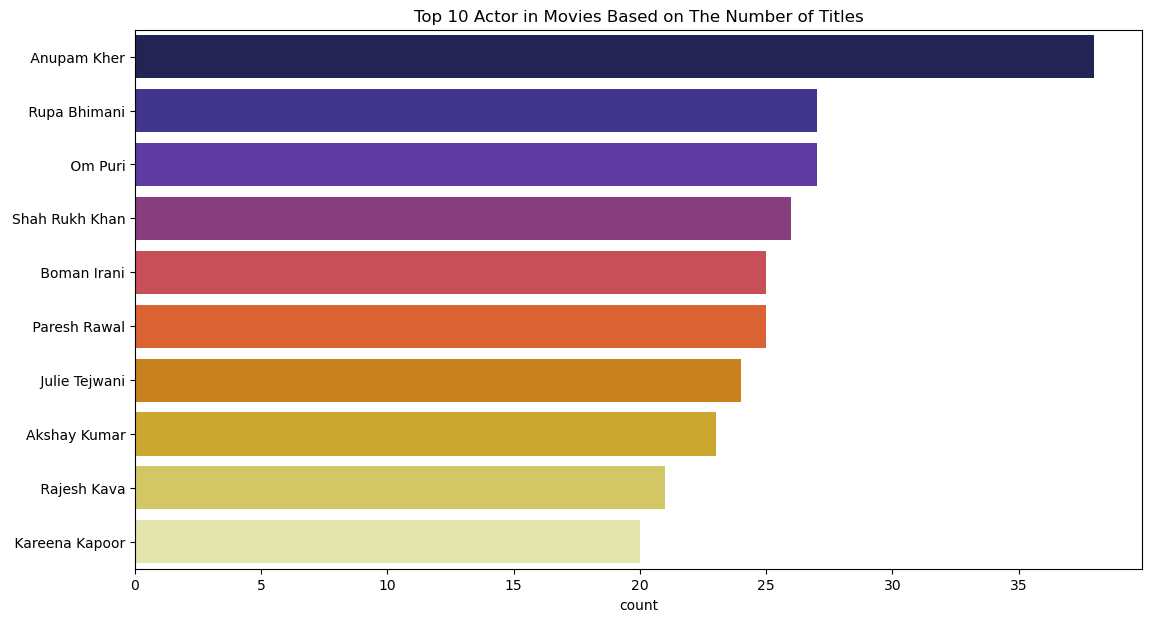

In [46]:
netflix_shows_df = df.loc[df['type']=='Movie']
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'Unknown Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor in Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='CMRmap')
plt.show()

#### The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

### Top 10 Countries on Netflix

In [47]:
filtered_cntry=pd.DataFrame()
# Unnesting the data
filtered_cntry=df['country'].str.split(', ',expand=True).stack()
# .strip() method is used to Remove Leading and Trailing Characters from Strings in Python
filtered_cntry=filtered_cntry.to_frame()
filtered_cntry.columns=['Country']
countries=filtered_cntry.groupby(['Country']).size().reset_index(name='Total Content')
countries=countries[countries.Country !='Unknown Country']
countries=countries.sort_values(by=['Total Content'],ascending=False)
countriesTop10=countries.head(10)
countriesTop10=countriesTop10.sort_values(by=['Total Content'])
fig4=px.bar(countriesTop10,x='Total Content',y='Country',color='Total Content', 
            title='Top 10 Countries on Netflix',text_auto=True,height=500)

fig4.show()

#### Based on the visual representation above we can see that the United States has been a major producer of both movies and TV shows, followed by India and the UK.

# BIVARIATE & MULTIVARIATE ANALYSIS

In [48]:
#create a dataframe with "year" and "release_year" column
content= pd.DataFrame({'Type': df['type'],'Year': df['release_year']})

In [49]:
#boxplot showing how old/new the content is on netflix platform
fig = px.violin(content, y="Year", x="Type", color="Type", box=True, points="all",
          hover_data=content.columns,title='FRESHNESS OF CONTENT ON NETFLIX', color_discrete_map={'TV Show':"#673389",'Movie':'#59bf52'})
fig.show()

#### Most of the TV shows belongs to 21st century and are fresh, however there are some outiers showing that there are a few shows of mid 20th century too. In case of Movies, the content mostly belongs to 1980-2020 and a few outliers showing movies released in mid 20th century. The number of outliers are more in case of Movies but outliers are more widely spread in case of TV Shows.

In [50]:
# splitting the Dataframe as Movie and TVShow
df_movie = df.loc[df['type']=='Movie']
df_TVshow = df.loc[df['type']=='TV Show']
# Renaming the column Duration New as No. of seasons as TV shows are represented in No. of Seasons Not in time duration
df_TVshow=df_TVshow[['title','release_year','Duration_New']]
df_TVshow=df_TVshow.rename(columns={"Duration_New": "No. of Seasons"})

### Movies Release Year vs Time Duration (using Scatter Plot)

In [51]:
fig = px.scatter(df_movie, x="release_year", y="Duration_New", color="Duration_New", 
                 hover_data=['title'],title="Movies Release Year vs Time Duration in Netflix")
fig.show()

#### From the above graph we could infer that most of the content has the duration timeframe between 100 minutes to 150 minutes and they are mostly released between the year 2000 until 2020

### TV Shows Release Year vs No. of Seasons (using Scatter Plot)

In [52]:
fig = px.scatter(df_TVshow, x="release_year", y="No. of Seasons", color="No. of Seasons",
                 title="TV Shows Release Year vs No. of Seasons in Netflix")
fig.show()

#### From the above graph we could infer most of the TV Shows doesn't go beyon 7 Seasons, they are relased in the year between 2000 and 2020

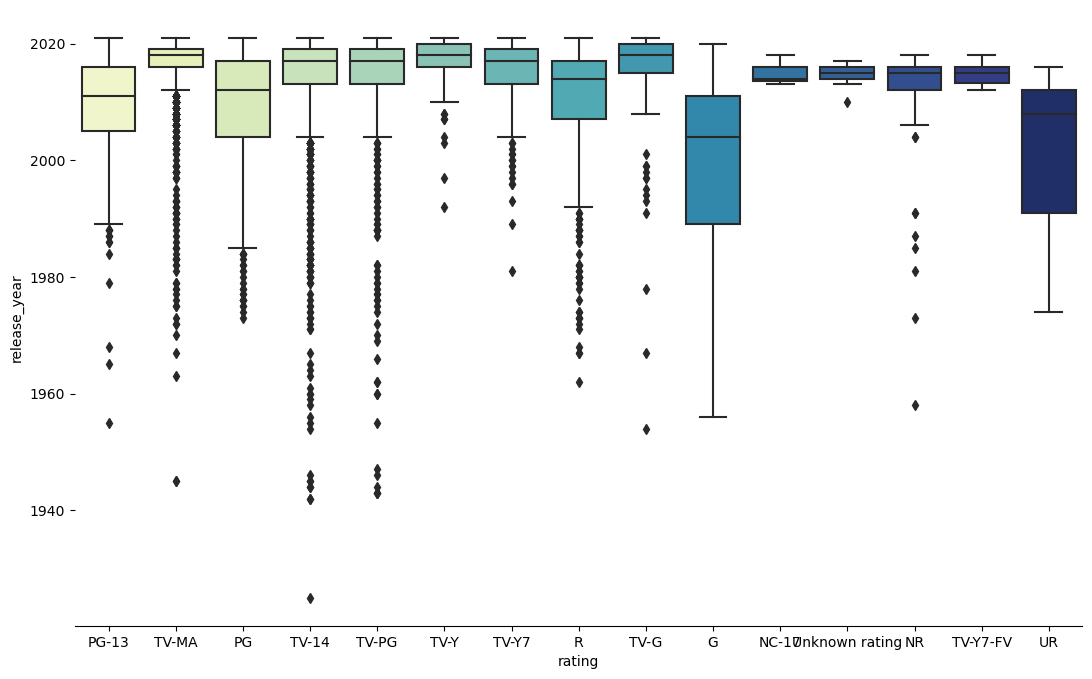

In [53]:
plt.figure(figsize=(13,8))
sns.boxplot(y='release_year', x='rating', data=df, palette='YlGnBu')
sns.despine(left=True)
#plt.ylim(1980,2020)
plt.show()

#### In the above box plot we could analyse what type of ratings was released in what year. The box plots tell more than just the average release year.

### Shows Added over Different months of a year in Netflix

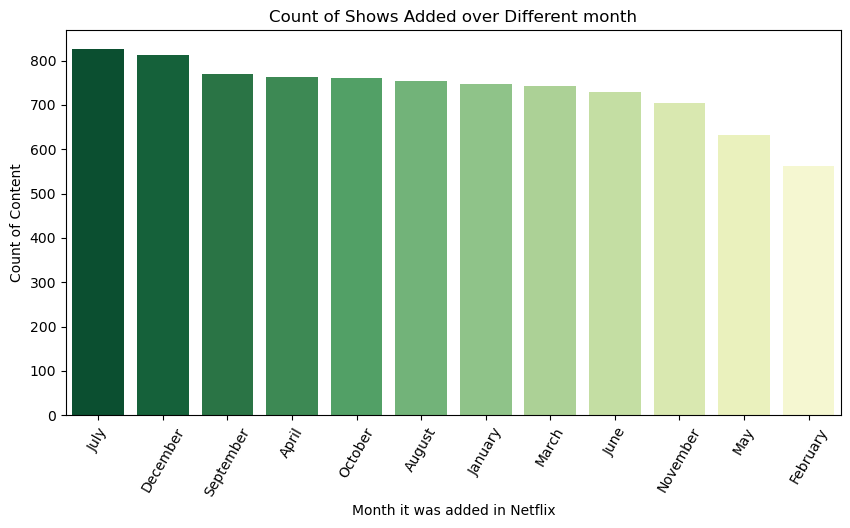

In [54]:
DM = df.groupby('Added_Mnth').count().reset_index().sort_values(ascending=False, by='show_id')[0:25]
plt.figure(figsize=(10,5))
g = sns.barplot(x='Added_Mnth', data=DM, y='show_id', palette='YlGn_r')
plt.ylabel('Count of Content')
plt.xlabel('Month it was added in Netflix')
plt.title('Count of Shows Added over Different month')
plt.xticks(rotation=60)
plt.show()

#### From the above graph we could see that July, December, September followed by April where most of the movies are being Added.

### Shows Added over various Year & Month in Netflix (Top 25)

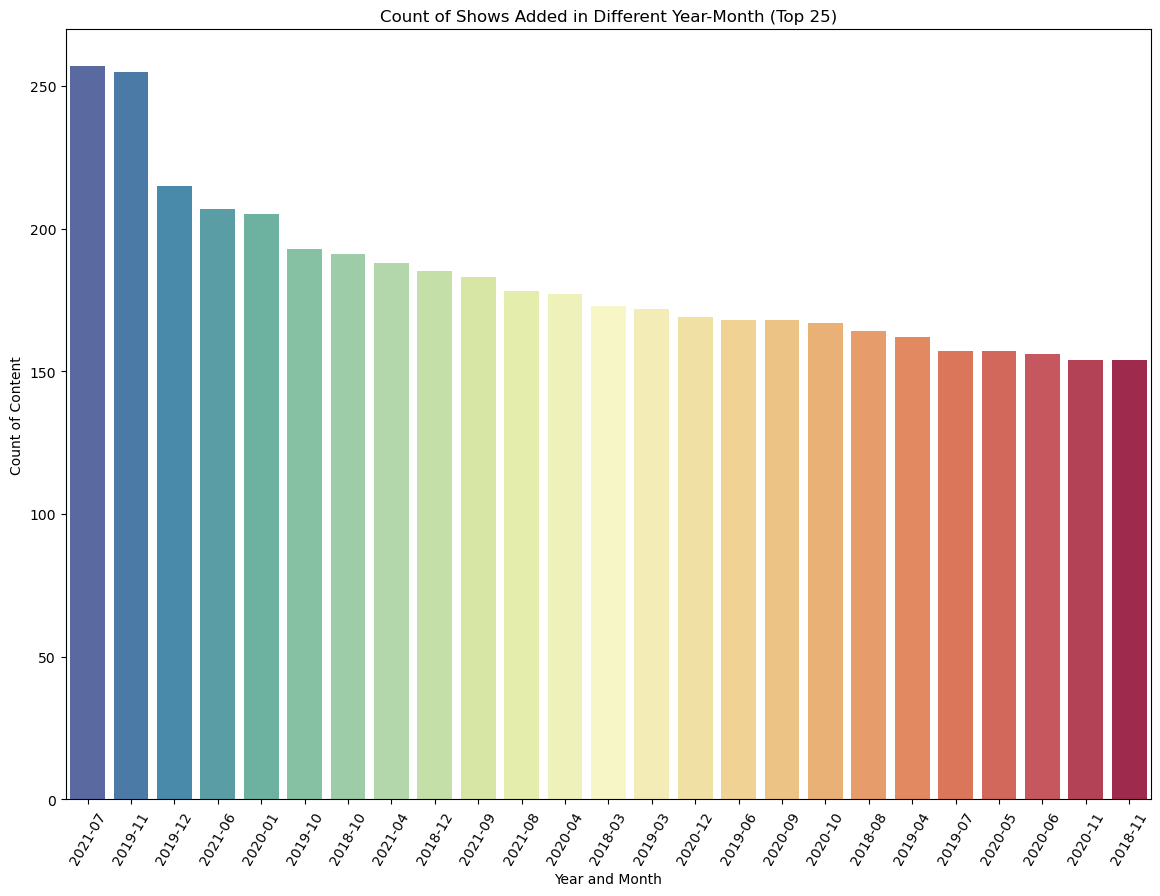

In [55]:
YM = df.groupby('Added_Yr_Month').count().reset_index().sort_values(ascending=False, by='show_id')[0:25]
plt.figure(figsize=(14,10))
g = sns.barplot(x='Added_Yr_Month', data=YM, y='show_id', palette='Spectral_r')
plt.ylabel('Count of Content')
plt.xlabel('Year and Month')
plt.title('Count of Shows Added in Different Year-Month (Top 25)')
plt.xticks(rotation=60)
plt.show()

#### From the above graph we could see that in the year 2021 July, most of movies got release in netflx follwed by 2019 Nov & Dec, its indicates that post Covid, there is peak in movies getting released.

### Shows Added over various Year & Month in Netflix (using HeatMap)

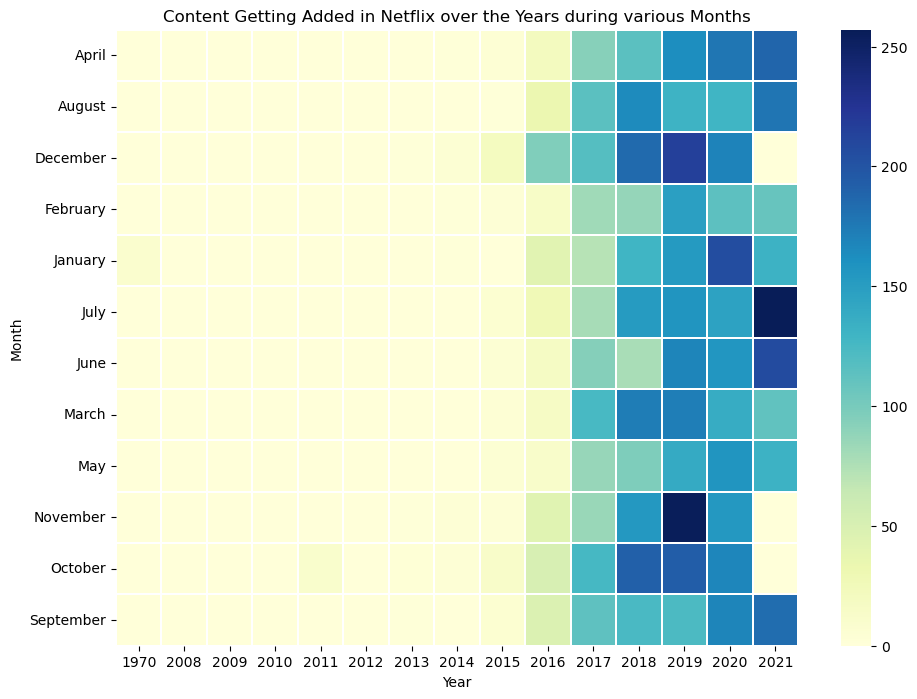

In [56]:
month_year_df = df.groupby('Added_Yr')['Added_Mnth'].value_counts().unstack().fillna(0).T
plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Getting Added in Netflix over the Years during various Months")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

#### In the above heatmap, we can see that around 2016 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2021, the data stops at 2021 since that is the latest month available in the dataset.

### Trend of No. of Movies & TV Show getting release over the years

In [57]:
cnt_release=df[['type','release_year']]
cnt_release=cnt_release.rename(columns={"release_year": "Release Year"})
cnt_release=cnt_release.groupby(['Release Year','type']).size().reset_index(name='Total Content')
fig5 = px.line(cnt_release, x="Release Year", y="Total Content",
               color='type',title='Trend of No. of Movies & TV Show getting release over the years',markers=True)
fig5.show()

#### The above graph indicates that there were more Movies got released post 2010 compared to TV Show and Movie releases started declining post 2018 and TV shows release getting decreased from 2020

## Distribution of Movie duration

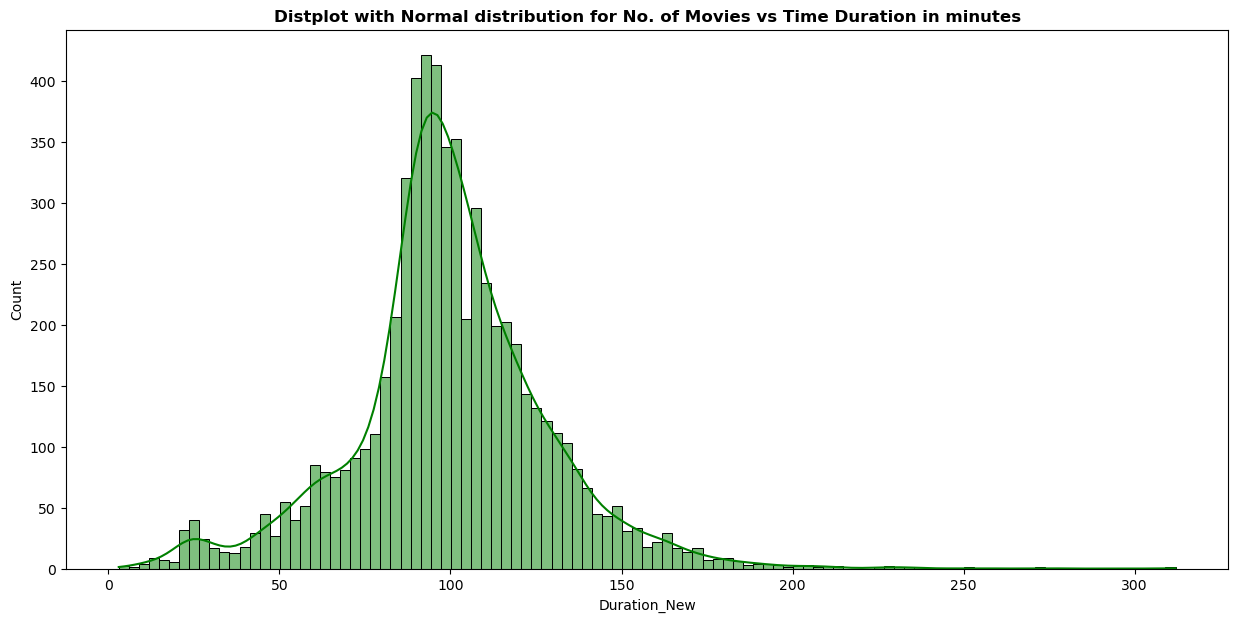

In [58]:
plt.figure(figsize=(15,7))
df3 = df[df["type"]=="Movie"]
sns.histplot(df3["Duration_New"],kde=True, color="green")
plt.title('Distplot with Normal distribution for No. of Movies vs Time Duration in minutes',fontweight="bold")
plt.show()

#### Form the above graph we can infer that majority of the movies have duration ranging from 85 min to 120 min.

### Distribution of TV Show Seasons

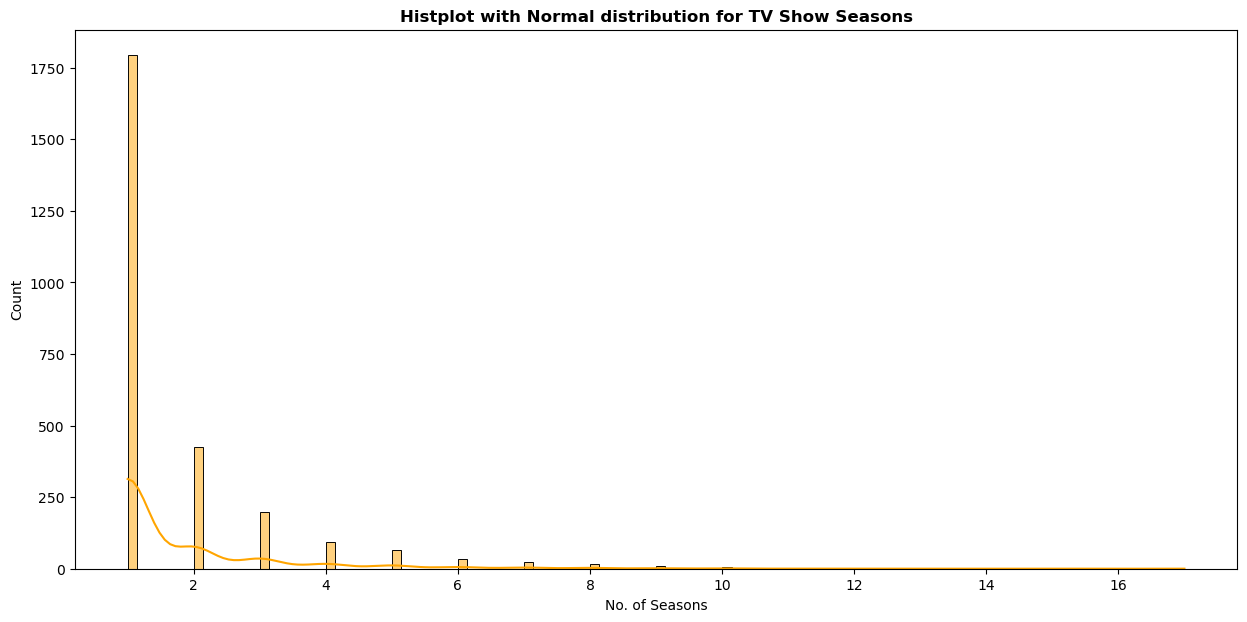

In [59]:
plt.figure(figsize=(15,7))
df4 = df[df["type"]=="TV Show"]
df4 = df4.rename(columns={"Duration_New": "No. of Seasons"})
sns.histplot(df4["No. of Seasons"],kde=True, color="orange")
plt.title('Histplot with Normal distribution for TV Show Seasons',fontweight="bold")
plt.show()

#### From the above graph we can infer that 90% of the TV_Shows end by at Season 4

## Analysis using wordcloud library

In [60]:
#import relevant library for wordcloud
from wordcloud import WordCloud, STOPWORDS
#create a single string of all descriptions.
text=''
for i in range(df['description'].shape[0]):
    text= text + df['description'][i]

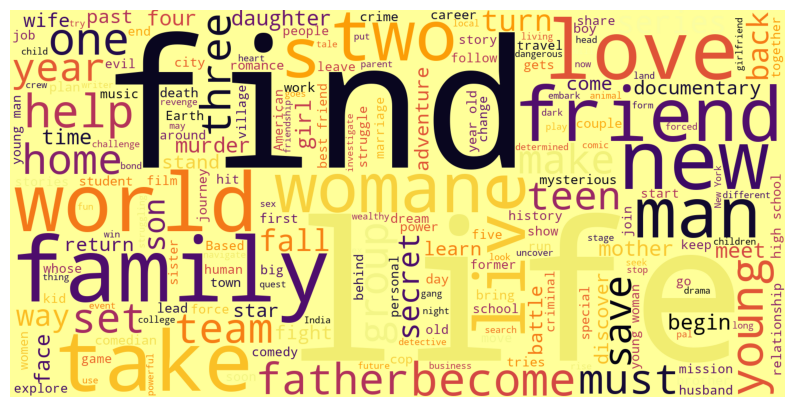

In [61]:
#create wordcloud of description
wordcloud = WordCloud(background_color="#ffff99",
                      width=1600, height=800, stopwords= set(STOPWORDS),colormap='inferno').generate(text)
plt.figure( figsize=(10,10) );
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Through the description of content, we see some words/describing words being most popular about Netflix's content.

# Below are Analysis specific to INDIA Contents

In [62]:
df_india.shape

(1046, 19)

### Movies & TV Shows release in India over the years

In [63]:
cnt_release=df_india[['type','release_year']]
cnt_release=cnt_release.rename(columns={"release_year": "Release Year"})
cnt_release=cnt_release.groupby(['Release Year','type']).size().reset_index(name='Total Content')
fig5 = px.line(cnt_release, x="Release Year", y="Total Content",
               color='type',title='Trend of No. of Movies & TV Show getting release over the years in India',markers=True)
fig5.show()

#### The above line chart indicates that post 2000 move release getting increased and TV Shows started from 2010.

### No. of Movies & TV Show getting Added in Netflix India over the years

In [64]:
cnt_release=df_india[['type','Added_Year']]
#cnt_release=cnt_release.rename(columns={"Added_Year": "Release Year"})
cnt_release=cnt_release.groupby(['Added_Year','type']).size().reset_index(name='Total Content')
fig5 = px.line(cnt_release, x="Added_Year", y="Total Content",
               color='type',title='Trend of No. of Movies & TV Show getting Added in Netflix India over the years',markers=True)
fig5.show()

### The above line plot indicates that Netflix had a peak during 2017 and 2020 where most of the Movies are streamed in Netflix India, there was no significant rise in TV Show content added over the years.

### Distribution of Shows getting added over different months in India

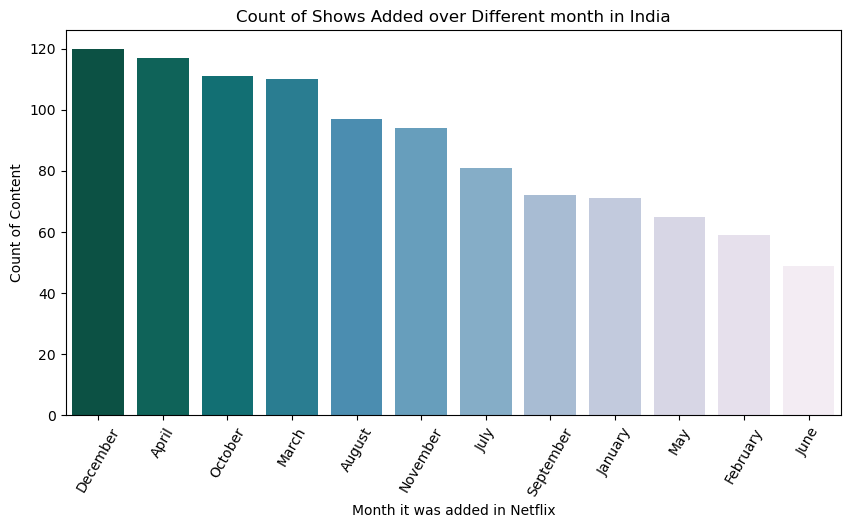

In [65]:
DM = df_india.groupby('Added_Mnth').count().reset_index().sort_values(ascending=False, by='show_id')[0:25]
plt.figure(figsize=(10,5))
g = sns.barplot(x='Added_Mnth', data=DM, y='show_id', palette='PuBuGn_r')
plt.ylabel('Count of Content')
plt.xlabel('Month it was added in Netflix')
plt.title('Count of Shows Added over Different month in India')
plt.xticks(rotation=60)
plt.show()

#### Based on the above analysis we could see that Decemeber, April, October, March which are dense festive seasons where most the content getting released.

### Distribution of Content Type on Netflix in India

In [66]:
y = df_india.groupby(['type']).size().reset_index(name='counts')
pieChart = px.pie(y, values='counts', names='type', 
                  title='Distribution of Content Type on Netflix in India',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

#### The above piechart indicates that in India movie content contributes to 92%, wherein TV shows have less than 10% only

### Top 10 Directors on Netflix in India

In [67]:
filtered_directors=pd.DataFrame()
# Unnesting the data
filtered_directors=df_india['director'].str.split(',',expand=True).stack().reset_index(level=1, drop=True)
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
# we're excluding the unknown director information
directors=directors[directors.Director !='Unknown Director']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop10=directors.head(10)
directorsTop10=directorsTop10.sort_values(by=['Total Content'])
fig=px.bar(directorsTop10,x='Total Content',y='Director',color='Total Content',
           title='Top 10 Directors on Netflix in India',text_auto=True,height=500)
fig.show()

#### David Dhawan contributs more content followed by Ram Gopal Varma & Anurag Kashyap

### Top 10 Successful Actors on Netflix in India

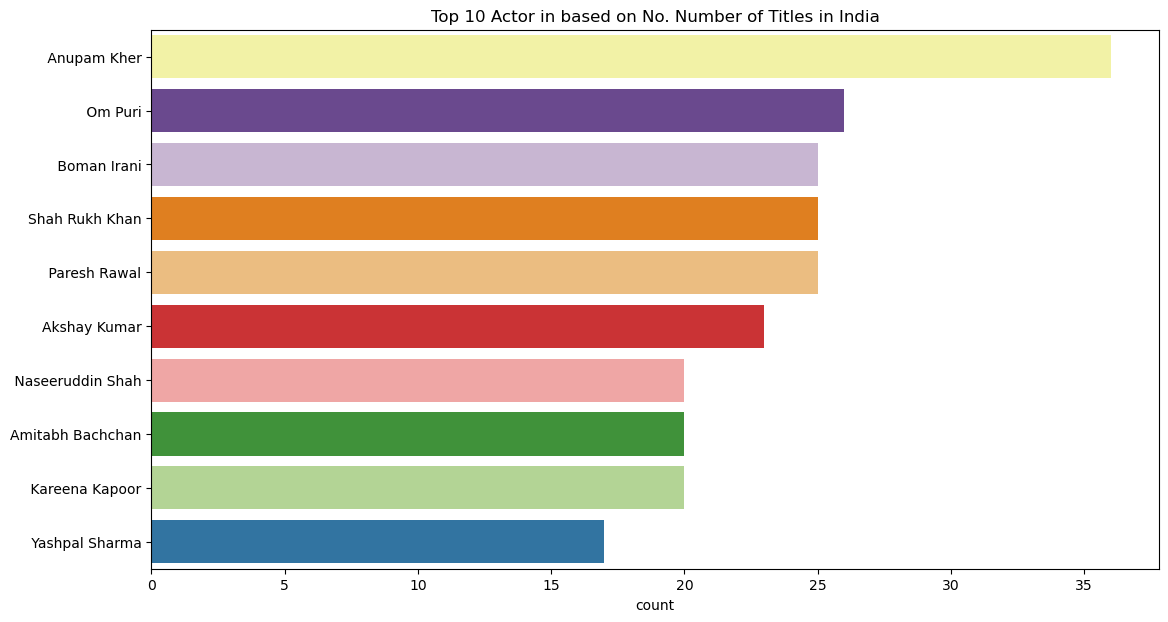

In [68]:
netflix_shows_df = df_india
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'Unknown Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor in based on No. Number of Titles in India')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='Paired_r')
plt.show()

#### Anupam Kher, Om Puri & Boman Irani are amonth the top Actors whose contents are widely shown in Netflix India

### Top 15 Genere categories on Netflix India

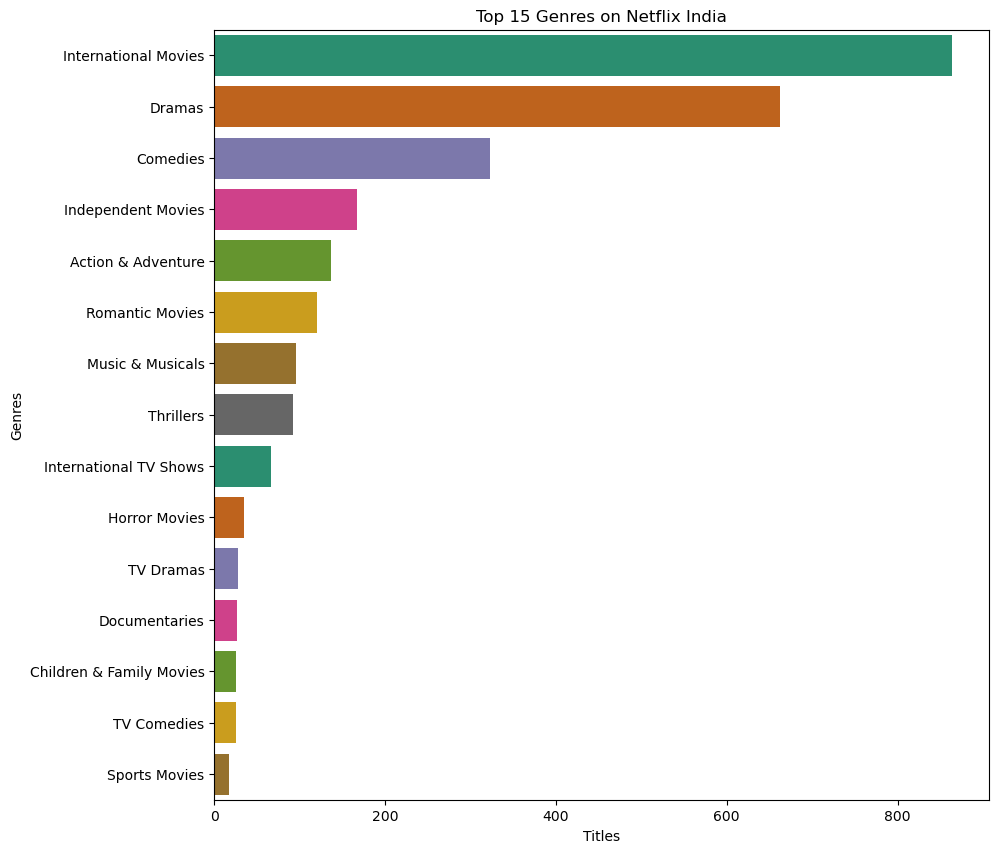

In [69]:
# Unnesting the data
filtered_genres = df_india.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:15], palette='Dark2')
plt.title('Top 15 Genres on Netflix India')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

#### Genre contents in India looks similar to overall content shows in All over the world

### Distribution of Movie duration for the Content shown in India on Netflix

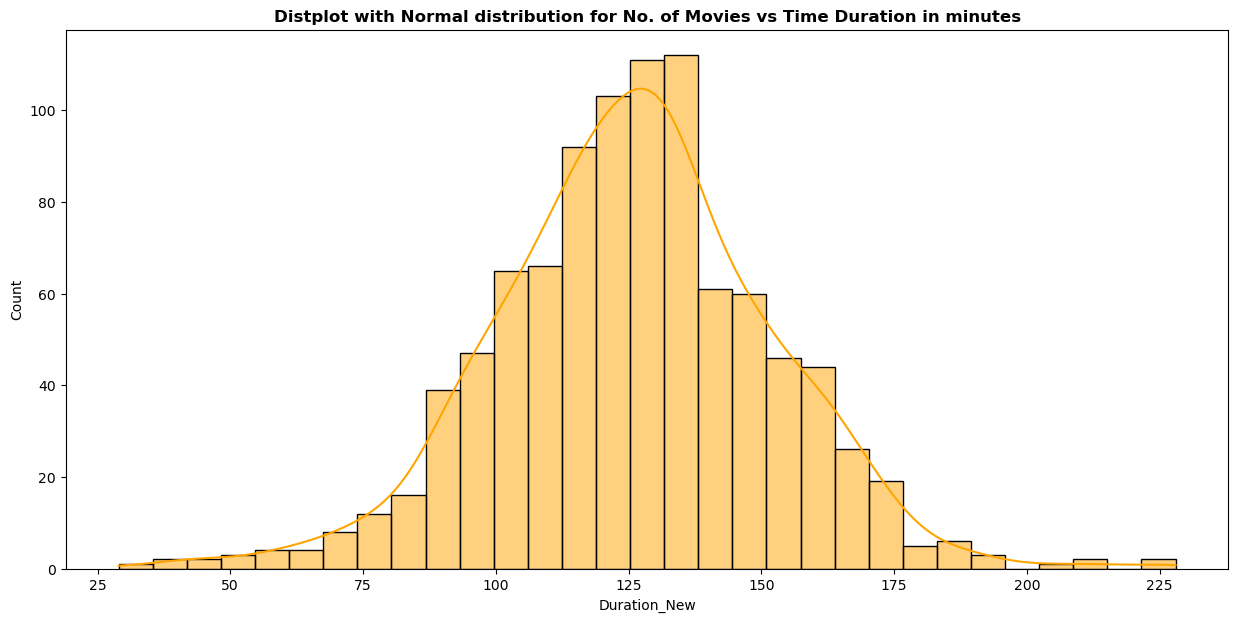

In [70]:
plt.figure(figsize=(15,7))
df3 = df_india[df_india["type"]=="Movie"]
sns.histplot(df3["Duration_New"],kde=True, color="orange")
plt.title('Distplot with Normal distribution for No. of Movies vs Time Duration in minutes',fontweight="bold")
plt.show()

#### Majority of the Indian contents has a durating ranging between 100 to 150 minutes

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Conclusions:

## We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:

#### >> The most content type on Netflix is movies which contributes 70%, the remaining is TV Shows.

#### >> The largest count of Netflix content is made with a "TV-MA","TV-14" rating which contributes 60% of the entire contents.

#### >> The largest count of Netflix type are Adult followed by Teens and Older kids which contributes more than 80%.

#### >> The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly.
#### >> The country by the amount of the produces content is the United States followed by India, UK and Canada.
#### >> The most popular director on Netflix, with the most titles, is Rajiv Chilaka followed by Raúl Campos & Jan Suter.
#### >> International Movies is a genre that is mostly streamed in Netflix followed by Dramas and Comedies.

#### >> The most popular actor on Netflix TV Shows based on the number of titles is Anupam Kher, Rupa Bhimani & Takahiro Sakurai.
#### >> The most popular actor on Netflix India, based on the number of titles, is Anupam Kher, Om Puri & Boman Irani falls under top 3 list.

#### >> The mostly shown content in India is Movies which contributes 92%

#### >> December, April, October, March which are dense festive seasons where most the content getting released in Netflix India.

#### >> Netflix India contents has a duration ranging between 100 to 150 minutes.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Recommendations:

## I've given below my recommendations based on the inference I understood on Netflix dataset.

#### >> February, May, November were the months when comparatively much less content was released. Therefore, these months may be a good choice for the success of a new release.

#### >> In India, February, June, May were the months when comparatively much less content was released. Therefore, these months may be a good choice for the success of a new release.

#### >> A good number of movies on Netflix are has the duration of 80-130 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3-hour movie in one sitting.

#### >> For Indian customers preferred duration is 100 to 150 minutes, so content creators should also focus on, duration of the content streamed in Netflix.

#### >> Following are the list of Countries where less than 5 Content are getting released, hence Netflix should focus on formulating strategies to increase More No. of contents getting released. Iran, Croatia, Bangladesh, Venezuela, Slovenia, Syria, Soviet Union, Zimbabwe, Ukraine, Senegal, Algeria, Malta, Mauritius, Sri Lanka, Palestine, Puerto Rico, Bahamas.

#### >> TV Shows are comparatively low compared to Movies, therefore creators should bring interesting contents to cater the users who are mostly stay at home, e.g.: Old age people, House wife’s and college students.

#### >> In general Netflix rental plans are relatively Higher compared to other major streaming platform, hence Netflix should work formulating better pricing strategy to have a better market share specially India where Netflix have potential to grow considering Indian population in mind.

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~